Populating the interactive namespace from numpy and matplotlib


C:\Users\busra\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\Users\busra\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\busra\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


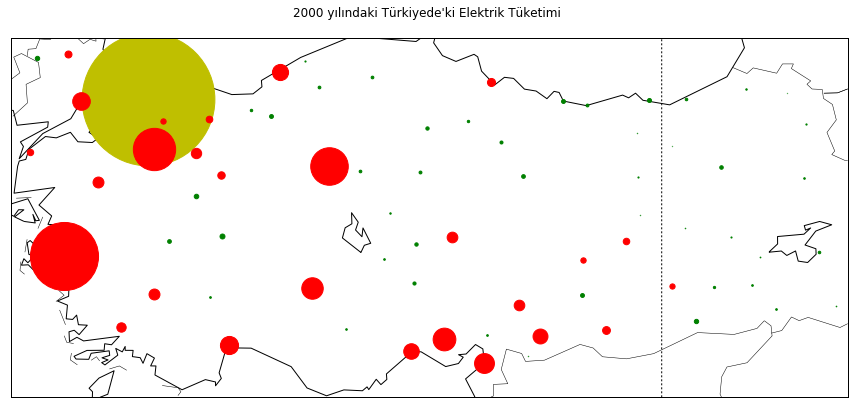

In [3]:
import csv
%pylab inline
filename = 'C:/Users/busra/Desktop/PYTHON/dataelektrik.csv'
yil=2000
lats, lons = [], []
tuketim = []

with open(filename) as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        if(int(row[0])==yil):
            lats.append(float(row[18]))
            lons.append(float(row[19]))
            tuketim.append(int(row[4]))

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

pylab.rcParams['figure.figsize']=(15,10 )


def get_marker_color(tuketim):
    if tuketim < 700000:
        return ('go')
    elif tuketim < 10000000:
        return ('ro')
    else:
        return ('yo')

eq_map = Basemap(projection='merc', resolution = 'l',
              lat_0=0, lon_0=45,
              llcrnrlon=26, llcrnrlat=36,
              urcrnrlon=44, urcrnrlat=42,)

eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'none')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 20))
eq_map.drawparallels(np.arange(-90, 90, 30))

min_marker_size = 0.0000075
for lon, lat, mag in zip(lons, lats, tuketim):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    

title_string = "2000 yılındaki Türkiyede'ki Elektrik Tüketimi \n"
plt.title(title_string)

plt.show()